# An analysis of the COVID-19's Lockdown effect on the Pollution level in Delhi

Delhi is one of many capitals enjoying improved air quality since restrictions were introduced due to the coronavirus .
A nationwide lockdown imposed across India on 24 March to stop the spread of the coronavirus – the largest lockdown of its kind attempted anywhere – has led to widespread chaos and suffering, especially among the country’s 300 million poor. Yet in Delhi, the world’s most polluted city, it has also resulted in some of the freshest air the capital has seen in decades.

# This notebook covers  -
   
*  Analyzing pollution levels in delhi over the years from 2015 to 2020
*  Effect of lockdown on pollution level of delhi

# About Dataset

The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India, But I am using only delhi's data for analysis.

A tutorial of how AQI is calculated is available here: https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index

The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

### Do UPVOTE  if you like my work

# Air-Pollution-everything-you-need-know 

## What Is Air Pollution?

Car emissions, chemicals from factories, dust, pollen and mold spores may be suspended as particles. Ozone, a gas, is a major part of air pollution in cities. When ozone forms air pollution, it's also called smog.

Some air pollutants are poisonous. Inhaling them can increase the chance you'll have health problems. People with heart or lung disease, older adults and children are at greater risk from air pollution. Air pollution isn't just outside - the air inside buildings can also be polluted and affect your health.

## Types of air pollution

* particulate matter
* nitrogen dioxide
* ozone
* sulphur dioxide 

### Particular matter

Particulate matter is a mix of solids and liquids, including carbon, complex organic chemicals, sulphates, nitrates, mineral dust, and water suspended in the air.

PM varies in size. Some particles, such as dust, soot, dirt or smoke are large or dark enough to be seen with the naked eye. But the most damaging particles are the smaller particles, known as PM10 and PM2.5. PM10 refers to particles with a diameter smaller than 10 microns (10µm) – that’s 100 times smaller than a millimetre. PM2.5 refers to particles with a diameter smaller than 2.5 microns, and these are known as fine particles. The smallest fine particles, less than 0.1 micron in diameter, are called ultrafine particles.

### Nitrogen dioxide (NO2)

Nitrogen dioxide is a gas and is a major component of urban air pollution episodes.Man-made sources of nitrogen oxides(NO), including nitrogen dioxide(NO2), are vehicles, power stations and heating. Diesel vehicles are major contributors in urban areas. Roadside levels are highest where traffic is busiest.

### Ozone (O3)

Ozone is a gas composed of 3 atoms of oxygen. In the upper level of the Earth’s atmosphere, it absorbs harmful ultraviolet radiation.Near the ground, ozone is made by a chemical reaction between the sun’s rays and organic gases and oxides of nitrogen emitted by cars, power plants, chemical plants and other sources.Ozone is usually highest in the spring and summer and lowest in the winter. Ozone levels are highest during the afternoon and are often higher in the country than in towns. Ozone is a major component of summer air pollution episodes.

### Sulphur dioxide (SO2)

Sulphur dioxide is a colourless gas, with a pungent, suffocating smell. It’s produced by burning sulphur-containing fuels such as coal and oil. This includes vehicles, power generation and heating.
Most sulphur dioxide comes from electric industries that burn fossil fuels, and also from petrol refineries and cement manufacturing. It can travel over long distances and contributes to the formation of ozone.



# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import os

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go




# Importing datset

In [2]:
url='../input/air-quality-data-in-india/city_day.csv'
city_day_data=pd.read_csv(url)

# Extract delhi's data 

delhi_data=city_day_data.groupby('City').get_group('Delhi')


In [3]:
delhi_data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


# Handling Missing values

In [4]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [5]:
missing_values_table(delhi_data)

Your selected dataframe has 16 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
Xylene,781,38.9
SO2,110,5.5
O3,84,4.2
PM10,77,3.8
AQI,10,0.5
AQI_Bucket,10,0.5
NH3,9,0.4
PM2.5,2,0.1
NO,2,0.1
NO2,2,0.1


### Imputation using Linear Interpolation method

Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.

In [6]:
delhi_data.interpolate(limit_direction="both",inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
missing_values_table(delhi_data)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
AQI_Bucket,10,0.5


### Imputing AQI_bucket missing values according to aqi

In [8]:
delhi_data['AQI_Bucket'].iloc[0]

'Severe'

In [9]:
for i,each in enumerate(delhi_data['AQI_Bucket']):
    if pd.isnull(delhi_data['AQI_Bucket'].iloc[i]):
        if delhi_data['AQI'].iloc[i]>=0.0 and delhi_data['AQI'].iloc[i]<=50.0:
            delhi_data['AQI_Bucket'].iloc[i]='Good'
        elif delhi_data['AQI'].iloc[i]>=51.0 and delhi_data['AQI'].iloc[i]<=100.0:
            delhi_data['AQI_Bucket'].iloc[i]='Satisfactory'
        elif delhi_data['AQI'].iloc[i]>=101.0 and delhi_data['AQI'].iloc[i]<=200.0:
            delhi_data['AQI_Bucket'].iloc[i]='Moderate'
        elif delhi_data['AQI'].iloc[i]>=201.0 and delhi_data['AQI'].iloc[i]<=300.0:
            delhi_data['AQI_Bucket'][i]='Poor'
        elif delhi_data['AQI'].iloc[i]>=301.0 and delhi_data['AQI'].iloc[i]<=400.0:
            delhi_data['AQI_Bucket'].iloc[i]='Very Poor'
        else:
            delhi_data['AQI_Bucket'].iloc[i]='Severe'


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.

## **Now Our dataset is ready for analaysis**

In [10]:
delhi_data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe


# PM2.5 in Delhi

In [11]:
fig = px.line(delhi_data, x="Date", y="PM2.5")
fig.show()

> As we can see from the above graph PM2.5 changes seasonally , It is peak in winter months like jan ,nov ,dec ,jan, feb
> Comparatively high in nov 2016 ,nov 2017 and nov 2019


## Pattern of PM2.5 in 2019 and 2020

In [12]:
df_year_19_20=delhi_data[delhi_data['Date']>='2019']

In [13]:
fig = px.line(df_year_19_20, x="Date", y="PM2.5")
fig.show()

In [14]:
Mar_may_2019=delhi_data[(delhi_data['Date'] >= '2019-03') & (delhi_data['Date'] <= '2019-05')]
Mar_may_2020=delhi_data[(delhi_data['Date'] >= '2020-03') & (delhi_data['Date'] <= '2020-05')]

In [15]:
plt.style.use('fivethirtyeight')

## Effect of lockdown in PM2.5

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Mar_may_2019['Date'], y=Mar_may_2019['PM2.5'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2019'))
fig.add_trace(go.Scatter(x=Mar_may_2019['Date'], y=Mar_may_2020['PM2.5'],
                    mode='lines+markers',
                    name='PM2.5 levels of 2020'))

fig.show()

> PM2.5 lower this year in march and april , it may be because of lockdown (as compared to year 2019)

#  PM10 in Delhi

In [17]:
fig = px.line(delhi_data, x="Date", y="PM10")
fig.show()

> similar pattern like PM2.5(Seasonal changes)

## Pattern of PM10 in 2019 and 2020

In [18]:
fig = px.line(df_year_19_20, x="Date", y="PM10")
fig.show()

## Effect of lockdown in PM10

In [19]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Mar_may_2019['Date'], y=Mar_may_2019['PM10'],
                    mode='lines+markers',
                    name='PM10 levels of delhi march and april month of 2019'))
fig.add_trace(go.Scatter(x=Mar_may_2019['Date'], y=Mar_may_2020['PM10'],
                    mode='lines+markers',
                    name='PM10 levels of delhi march and april month of 2020'))
fig.show()

> As from the above graph we can see that PM10 is lower this year in march and april , it may be because of lockdown (as compared to year 2019)                                                                                                                       
> PM10 level in 28 march 2019 ~  257.27                                                                                             
> PM10 level in 28 march 2020 ~  34.15

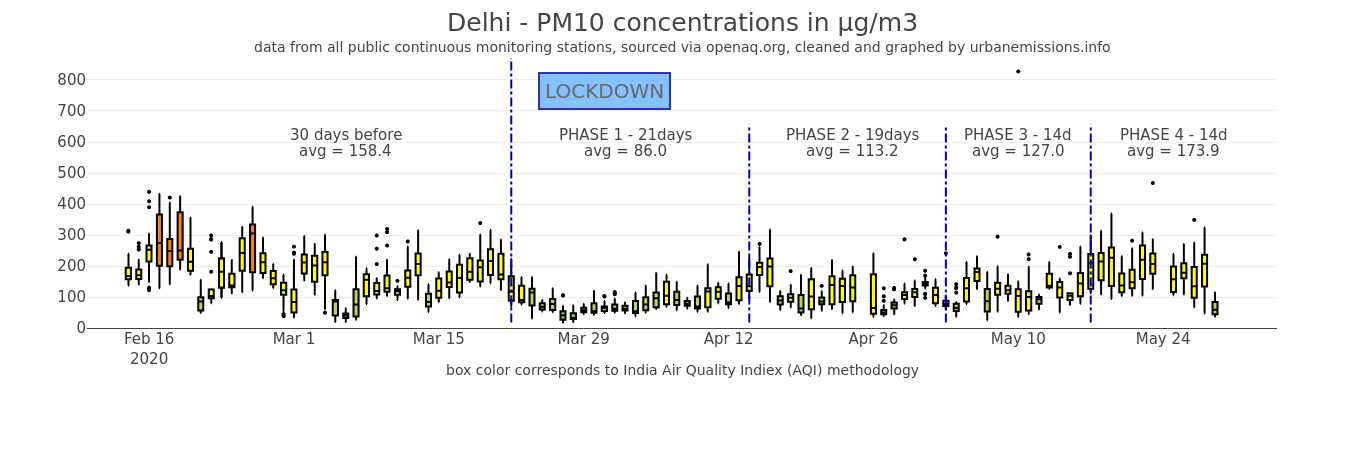

# NO levels in delhi

In [20]:
fig = px.line(delhi_data, x="Date", y="NO")
fig.show()

* ***NO*** level is high in Winter months 
* Highest ***NO*** level is seen in ***Jan 2017***  i.e 221.03


## Pattern of *NO* in 2019 and 2020

In [21]:
fig = px.line(df_year_19_20, x="Date", y="NO")
fig.show()

## Lockdown Effect in *NO* level

In [22]:
march24_2019=delhi_data[(delhi_data['Date'] >= '2019-03-23') & (delhi_data['Date'] <= '2019-04-15')]
march24_2020=delhi_data[(delhi_data['Date'] >= '2020-03-23') & (delhi_data['Date'] <= '2020-04-15')]

In [23]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2019['NO'],
                    mode='lines+markers',
                    name='NO levels of delhi from 23-march-2019  to 15-april 2019'))
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2020['NO'],
                    mode='lines+markers',
                    name='NO levels of delhi from 23-march-2020  to 15-april 2020'))
fig.show()

 > Shocking right!! restrictions on vehicular activity led to reduction in NO levels 
 

# NO2 level in Delhi

In [24]:
fig = px.line(delhi_data, x="Date", y="NO2")
fig.show()

## Pattern of NO2 in 2019 and 2020

In [25]:
fig = px.line(df_year_19_20, x="Date", y="NO2")
fig.show()

> High in winter months

## Lockdown Effect in *NO2* level

In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2019['NO2'],
                    mode='lines+markers',
                    name='NO2 levels of delhi from 23-march-2019  to 15-april 2019'))
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2020['NO2'],
                    mode='lines+markers',
                    name='NO2 levels of delhi from 23-march-2020  to 15-april 2020'))
fig.show()

> NO2 levels are lowered this year than last year

# Ozone or O3 level in Delhi

In [27]:
fig = px.line(delhi_data, x="Date", y="O3")
fig.show()

 > O3 levels are high in year 2015-2017 and lowered in further years

## Pattern of NO2 in 2019 and 2020

In [28]:
fig = px.line(df_year_19_20, x="Date", y="O3")
fig.show()

> O3 is high in summer and comparatively lower in winters

##  Lockdown Effect in *O3* level

In [29]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2019['O3'],
                    mode='lines+markers',
                    name='O3 levels of delhi from 23-march-2019  to 15-april 2019'))
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2020['O3'],
                    mode='lines+markers',
                    name='O3 levels of delhi from 23-march-2020  to 15-april 2020'))
fig.show()

> O3 levels lower in lockdown period . Lowest O3 level is on 28 march 2020(25.6)

# Sulpher Dioxide levels in Delhi (SO2)

In [30]:
fig = px.line(delhi_data, x="Date", y="SO2")
fig.show()

> SO2 levels are increasing from 2015 then lowered in june 2016 then pick attained in 2017 and then again lowered after 2018

## Lockdown effect in SO2 levels in delhi

In [31]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2019['SO2'],
                    mode='lines+markers',
                    name='SO2 levels of delhi from 23-march-2019  to 15-april 2019'))
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2020['SO2'],
                    mode='lines+markers',
                    name='SO2 levels of delhi from 23-march-2020  to 15-april 2020'))
fig.show()

> SO2 Levels also lowered in lockdown period

# BTX  levels (Benzene,Toluene,Xylene)

Benzene, toluene, xylene, and formaldehyde are well-known indoor air pollutants, especially after house decoration. They are also common pollutants in the working places of the plastic industry, chemical industry, and leather industry

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=delhi_data['Date'], y=delhi_data['Benzene'],
                    mode='lines',
                    name='Benzene level'))
fig.add_trace(go.Scatter(x=delhi_data['Date'], y=delhi_data['Toluene'],
                    mode='lines',
                    name='Toluene level'))
fig.add_trace(go.Scatter(x=delhi_data['Date'], y=delhi_data['Xylene'],
                    mode='lines',
                    name='Xylene level'))
fig.show()

## BTX levels month-wise

In [33]:
data_2019=delhi_data[(delhi_data['Date'] >= '2019') & (delhi_data['Date'] < '2020')]
data_2019['BTX']=data_2019['Benzene'] + data_2019['Toluene'] + data_2019['Xylene']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
fig = px.line(data_2019, x="Date", y="BTX")
fig.show()

# Air Quality Index of Delhi

An air quality index is used by government agencies to communicate to the public how polluted the air currently is or how polluted it is forecast to become. Public health risks increase as the AQI rises. Different countries have their own air quality indices, corresponding to different national air quality standards. 

*Source - Wikipedia*

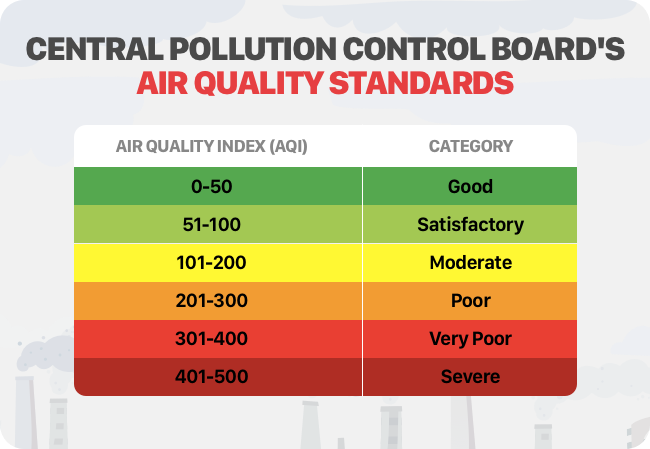

In [35]:
fig = px.line(delhi_data, x="Date", y="AQI")
fig.show()

> Graph shows the variation of various pollutant levels, from Jan 2019 onwards till date.

# Effect on AQI levels of delhi due to lockdown

In [36]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2019['AQI'],
                    mode='lines+markers',
                    name='AQI levels of delhi from 23-march-2019  to 15-april 2019'))
fig.add_trace(go.Scatter(x=march24_2019['Date'], y=march24_2020['AQI'],
                    mode='lines+markers',
                    name='AQI levels of delhi from 23-march-2020  to 15-april 2020'))
fig.show()

In [37]:
march24_2019['AQI'].mean()

210.66666666666666

In [38]:
march24_2020['AQI'].mean()

98.95833333333333

As AQI Levels changes POOR to SATISFACTORY due to lockdown as compared to last year

Much of the world is seeing significant reductions in many air pollutant and greenhouse gas emissions due to efforts to stem the covid-19 pandemic. This is a stark confirmation of the contribution of our everyday activities to sources of emissions of the air pollutants that we breathe and the greenhouse gases that drive global warming. The speed with which emissions have fallen shows how quickly we can improve our environment when motivated and how vulnerable we are living in degraded environments.

As with previous shocks, we know that pollution continues to occur even with significant government-imposed constraints. For example, pollutants from transport and industrial sectors have decreased but not from residential or agricultural sources. Moreover, some pollutants, like ozone, result from secondary atmospheric processes resulting in nonlinear links between reduced emissions and ambient concentrations 

While these decreases result in public health benefits from improved air quality, they come at the unacceptable cost of thousands of deaths, rapidly increasing unemployment, and staggering economic dislocation. And, at the individual level, some families may be exposed to even greater pollution levels (e.g. from increased open-burning cookstove meals) during the lockdown.

# Solutions that deliver economic and social objectives while simultaneously protecting our air and climate

* development, deployment, and integration of clean renewable energy instead of fossil fuels, ensuring equitable and affordable access for all;

*  measures which reduce short-lived climate pollutants such as addressing emissions from the burning or collection of municipal solid waste; these measures are often low/no-cost, and quickly achieve multiple near-term economic, public health, and social benefits;

* policies and regulations which improve indoor air quality by incentivizing energy access and energy efficiency of buildings and appliances;

* preserving our forests and other natural sinks, as well as in expanding them;

* sustainable food systems, reduced food waste, and the promotion of healthy diets;

* a more local, circular, and low-carbon economy incentivising safe reuse, remanufacturing, and recycling of products;

* more resource efficient, sustainable, and resilient supply chains;

* sustainable transport systems including encouraging active travel, work from home, and implementing policies to reduce daily commuting and reducing business travel;

* invest in knowledge institutions, especially in the Global South, to strengthen their capability to produce high quality and context relevant analyses and build the requisite human resources.